# Задача о рюкзаке
Это задача оптимизации: необходимо найти наилучший вариант использования ограниченных ресурсов при ограниченном наборе вариантов


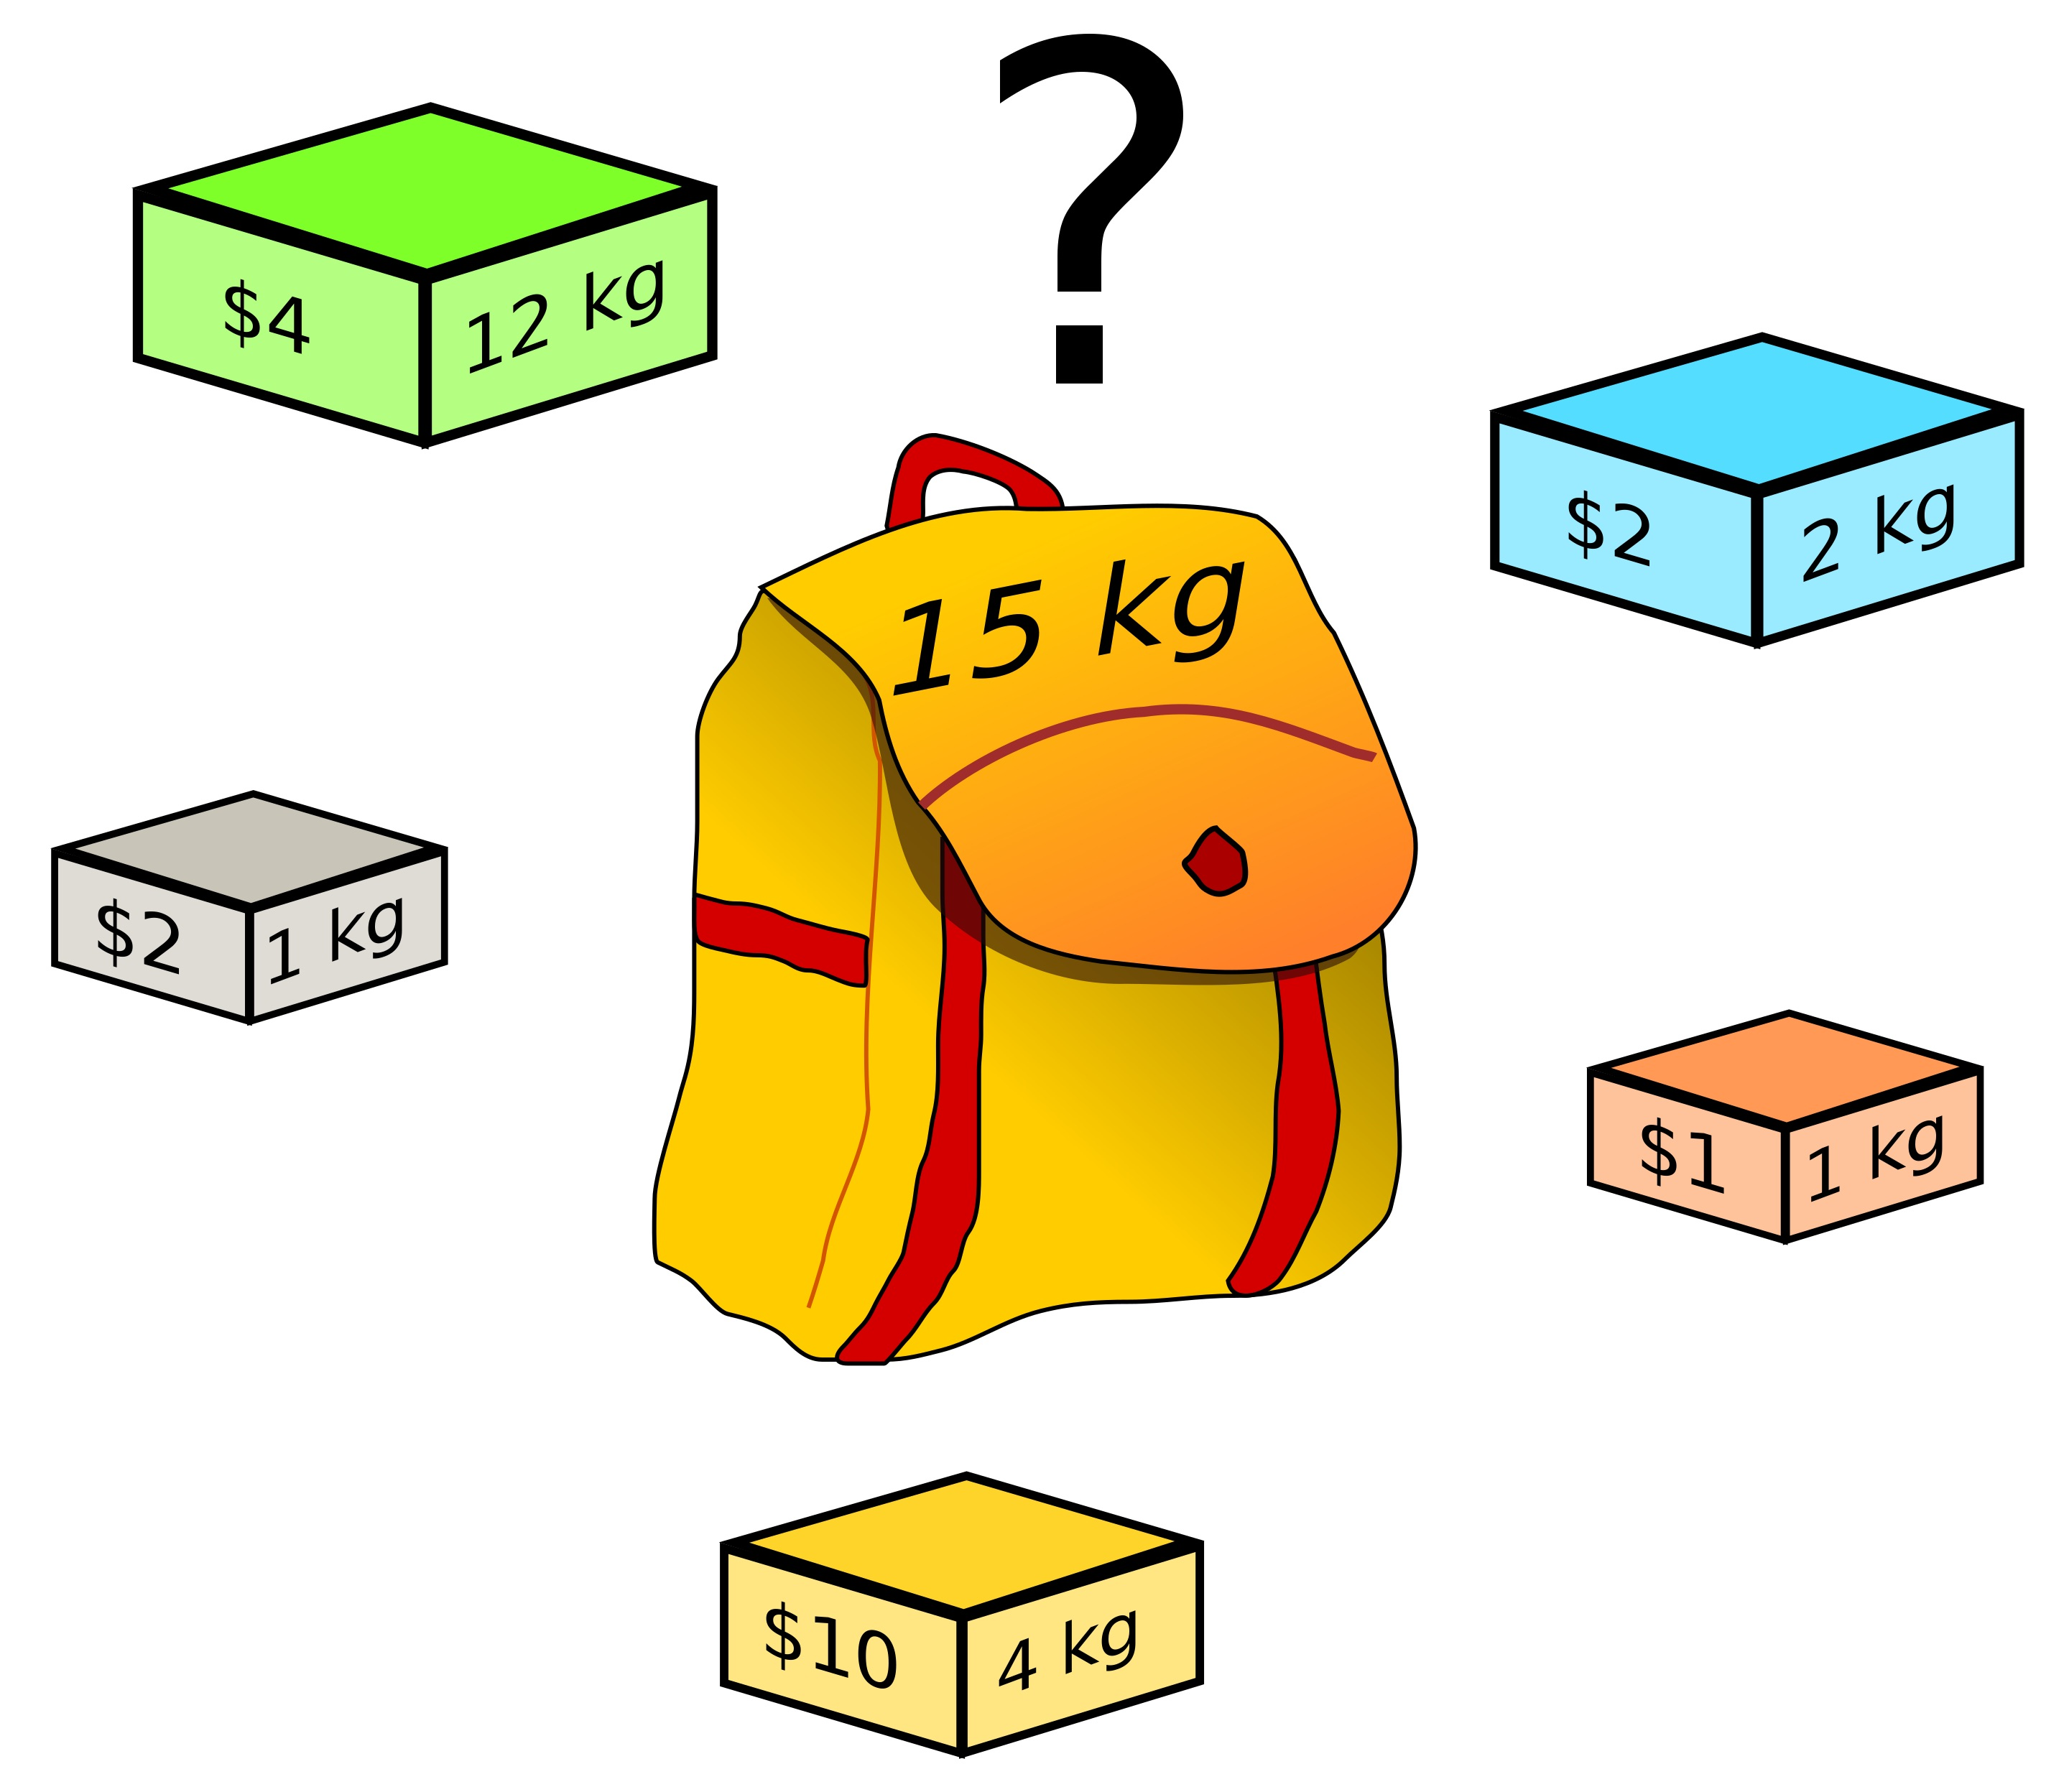
Рассмотрим *оптимистичную* постановку задачи. Пусть есть рюкзак вместимостью **B** кг. Мы переезжаем на некоторое время и потому хотим перевезти какие-то вещи в рюкзаке. Каждая вещь ($x_i$), имеющаяся у нас дома, имеет определенный вес ($a_i$, в кг) и определенную ценность ($c_i$). Как нам более *компактно* собрать рюкзак?
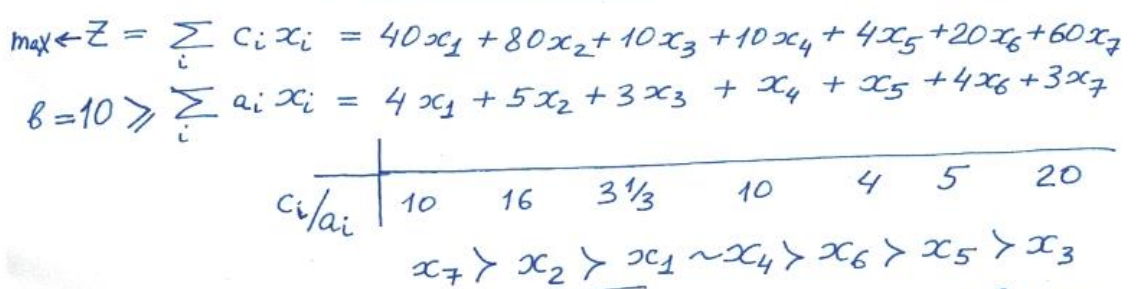
Если бы была возможность положить дробную часть каждой вещи, то задача решалась бы без проблем: достаточно рассмотреть отношение ценности к весу, отсортировать по получившимся числам и *собрать* рюкзак. В данном случае решение было бы таким: $x_7, x_2, x_4$ и $\frac{x_1}{4}$. **Интерпретация:** взять один ноутбук ($x_7$), один телевизор($x_2$), один пылесос ($x_4$) и 4ую часть холодильника ($\frac{x_1}{4}$).

In [9]:
class Item:
    def __init__(self, name, a, c):
        self.name = name
        self.weight = a
        self.value = c
    def __str__(self):
        return str(self.name) + f'({self.weight} ; {self.value})'
    def __repr__(self):
        return repr(self.name)

# смоделируем задачу
x1 = Item('Холодильник', 4, 40)
x2 = Item('Телевизор', 5, 80)
x3 = Item('Светильник', 3, 10)
x4 = Item('Пылесос', 1, 10)
x5 = Item('Утюг', 1, 4)
x6 = Item('Радио', 4, 20)
x7 = Item('Ноутбук', 3, 60)

Рассмотрим задачу в дискретном виде, то есть будем решать задачу **линейного целочисленного программирования**. Пусть каждый предмет ($x_i$) можно либо взять ($x_i=1$), либо не взять ($x_i=0$). То есть возможность взять дробную часть мы исключаем.

## Грубый подход
Можно сгенерировать множество всех подмножеств для исходного множества предметов и проанализировать каждый элемент этого подмножества:  
1) Проверить: вмещается ли данная комбинация предметов в рюкзак или нет?  
2) Если вмещается, то какова суммарная ценность вещей в рюкзаке (значение целевой функции z)?

In [10]:
def generate_power_set(A):
    n = len(A)
    if n < 2:
        return [ [], [A[0]] ]
    a_n = A[-1]
    power_set_reduce = generate_power_set(A[:-1])
    result = []
    for elem in power_set_reduce:
        result.append(elem)
        result.append(elem+[a_n])
    return result

In [12]:
# множество всех подмножеств
all_obj = [x1, x2, x3, x4, x5, x6, x7]
power_set = generate_power_set(all_obj)
for combination in power_set:
    print(combination)

[]
['Ноутбук']
['Радио']
['Радио', 'Ноутбук']
['Утюг']
['Утюг', 'Ноутбук']
['Утюг', 'Радио']
['Утюг', 'Радио', 'Ноутбук']
['Пылесос']
['Пылесос', 'Ноутбук']
['Пылесос', 'Радио']
['Пылесос', 'Радио', 'Ноутбук']
['Пылесос', 'Утюг']
['Пылесос', 'Утюг', 'Ноутбук']
['Пылесос', 'Утюг', 'Радио']
['Пылесос', 'Утюг', 'Радио', 'Ноутбук']
['Светильник']
['Светильник', 'Ноутбук']
['Светильник', 'Радио']
['Светильник', 'Радио', 'Ноутбук']
['Светильник', 'Утюг']
['Светильник', 'Утюг', 'Ноутбук']
['Светильник', 'Утюг', 'Радио']
['Светильник', 'Утюг', 'Радио', 'Ноутбук']
['Светильник', 'Пылесос']
['Светильник', 'Пылесос', 'Ноутбук']
['Светильник', 'Пылесос', 'Радио']
['Светильник', 'Пылесос', 'Радио', 'Ноутбук']
['Светильник', 'Пылесос', 'Утюг']
['Светильник', 'Пылесос', 'Утюг', 'Ноутбук']
['Светильник', 'Пылесос', 'Утюг', 'Радио']
['Светильник', 'Пылесос', 'Утюг', 'Радио', 'Ноутбук']
['Телевизор']
['Телевизор', 'Ноутбук']
['Телевизор', 'Радио']
['Телевизор', 'Радио', 'Ноутбук']
['Телевизор', 'Утюг']


In [14]:
def check_and_count(combination, bag_B):
    count = 0
    value = 0
    for item in combination:
        count += item.weight
        if count > bag_B:
            return -1
        value += item.value
    return value

In [18]:
max_value = -1
opt = None

for combination in power_set:
    comb_value = check_and_count(combination, 10)
    if comb_value > max_value:
        opt = combination
        max_value = comb_value 
print(f'Оптимальное решение методом грубой силы: {opt}')
# x2 x4 x5 x7

Оптимальное решение методом грубой силы: ['Телевизор', 'Пылесос', 'Утюг', 'Ноутбук']


## Динамическое программирование (метод ветвей и границ)
